In [117]:
%matplotlib inline

from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris, make_moons
from sklearn.model_selection import train_test_split, GridSearchCV, ShuffleSplit
from sklearn.tree import DecisionTreeClassifier, export_graphviz, DecisionTreeRegressor
from scipy.stats import mode

import matplotlib.pyplot as plt

In [2]:
iris = load_iris()
X = iris.data[:, 2:]
y = iris.target

In [3]:
tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [4]:
export_graphviz(
    tree_clf,
    out_file="img/iris_tree.dot",
    feature_names=iris.feature_names[2:],
    class_names=iris.target_names,
    rounded=True,
    filled=True
)

In [5]:
!dot -Tpng "img/iris_tree.dot" -o "img/iris_tree.png"

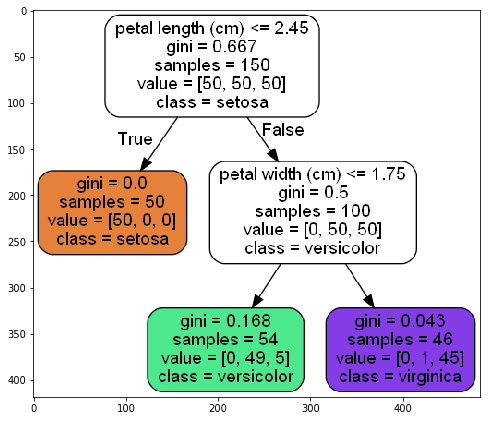

In [6]:
plt.figure(figsize=(8, 8))
plt.imshow(plt.imread("img/iris_tree.png"))
plt.show()

In [7]:
print(tree_clf.predict_proba([[5, 1.5]]))
print(tree_clf.predict([[5, 1.5]]))

[[0.         0.90740741 0.09259259]]
[1]


### Regression

In [8]:
tree_reg = DecisionTreeRegressor(max_depth=2)
tree_reg.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [9]:
export_graphviz(
    tree_reg,
    out_file="img/iris_tree_reg.dot",
    feature_names=iris.feature_names[2:],
    class_names=iris.target_names,
    rounded=True,
    filled=True
)

In [10]:
!dot -Tpng "img/iris_tree_reg.dot" -o "img/iris_tree_reg.png"

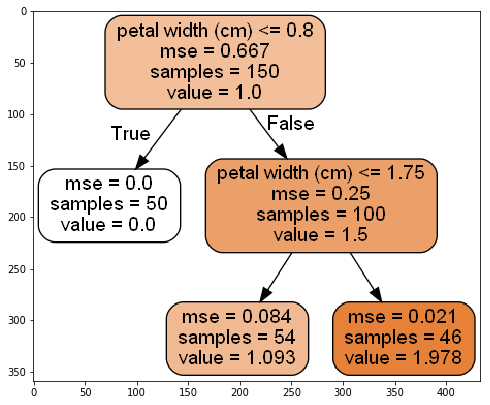

In [11]:
plt.figure(figsize=(8, 8))
plt.imshow(plt.imread("img/iris_tree_reg.png"))
plt.show()

### Excercises

Train and fine-tune a Decision Tree for the moons dataset

In [16]:
moons = make_moons(n_samples=10000, noise=0.4)
moons

(array([[ 1.46054912,  0.88246981],
        [-1.47456401,  0.45252459],
        [-0.48804984,  0.28832937],
        ...,
        [ 1.00670524, -0.66178996],
        [ 1.3970411 , -0.51807298],
        [ 0.22639192,  0.48865022]]),
 array([1, 0, 1, ..., 1, 1, 0], dtype=int64))

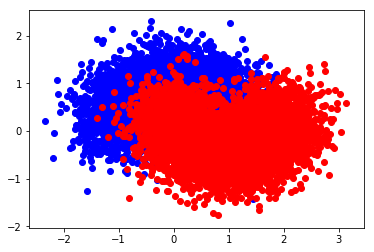

In [25]:
plt.scatter(moons[0][:, 0][moons[1]==0], moons[0][:, 1][moons[1]==0], c='b')
plt.scatter(moons[0][:, 0][moons[1]==1], moons[0][:, 1][moons[1]==1], c='r')
plt.show()

In [27]:
X_train, X_test, y_train, y_test = train_test_split(moons[0], moons[1], test_size=0.33, random_state=42)

In [67]:
clf = DecisionTreeClassifier()
param_grid = {'max_leaf_nodes':[14, 15, 16]}

gs = GridSearchCV(clf, param_grid, cv=3, n_jobs=-1, verbose=2, scoring='accuracy')
gs.fit(X_train, y_train)

print(gs.best_params_)
print(gs.best_score_)

Fitting 3 folds for each of 3 candidates, totalling 9 fits
{'max_leaf_nodes': 15}
0.8514925373134329


[Parallel(n_jobs=-1)]: Done   7 out of   9 | elapsed:    1.7s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:    1.7s finished


In [68]:
gs.best_estimator_.fit(X_train, y_train)
y_predict = gs.predict(X_test)
accuracy_score(y_test, y_predict)

0.8466666666666667

Grow a forest

In [108]:
rs = ShuffleSplit(n_splits=1000, train_size=100, test_size=0, random_state=42)

In [115]:
trees = list()

for indices_x in rs.split(X_train):
    clf_100 = DecisionTreeClassifier(max_leaf_nodes=15)
    clf_100.fit(X_train[indices_x[0]], y_train[indices_x[0]])
    trees.append(clf_100)

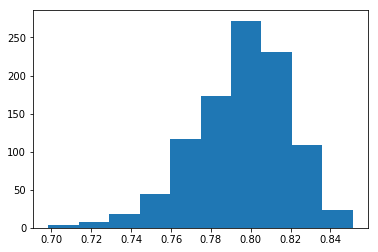

In [116]:
accuracies = list()

for tree in trees:    
    accuracies.append(accuracy_score(y_test, tree.predict(X_test)))

plt.hist(accuracies)
plt.show()

In [127]:
y_forest = list()
y_pred = []

for X_ in X_test:
    yy_ = [tree.predict([X_]) for tree in trees]
    y_pred.append(mode(yy_).mode[0])
    
accuracy_score(y_test, y_pred)

0.8560606060606061